<a href="https://colab.research.google.com/github/maxkleiner/maXbox/blob/master/logisticregression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# https://realpython.com/logistic-regression-python/


# For the purpose of this visual classification example, let’s just create arrays for the input (𝑥) and output (𝑦) values:


In [3]:
X = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
#y = np.array([0, 1, 0,1, 1, 1, 1, 1, 0, 1])
print(X)


[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


# The array X is required to be two-dimensional as matrix. 
# Once you have the input and output prepared, you can create and define your classification model.
# Other solver options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.


In [4]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X, y)
print(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [5]:
model = LogisticRegression(solver='liblinear', C=1, random_state=0).fit(X, y)

print(model.intercept_)
#array([-1.04608067])
print(model.coef_,'\n')
# The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). 
# The second column is the probability that the output is one, or 𝑝(𝑥).
print(model.predict_proba(X),'\n')

print('predict:',model.predict(X))
print('score:  ',model.score(X, y))


[-1.04608067]
[[0.51491375]] 

[[0.74002157 0.25997843]
 [0.62975524 0.37024476]
 [0.5040632  0.4959368 ]
 [0.37785549 0.62214451]
 [0.26628093 0.73371907]
 [0.17821501 0.82178499]
 [0.11472079 0.88527921]
 [0.07186982 0.92813018]
 [0.04422513 0.95577487]
 [0.02690569 0.97309431]] 

predict: [0 0 0 1 1 1 1 1 1 1]
score:   0.9


# The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). 
# The second column is the probability that the output is one, or 𝑝(𝑥).
# You can use the fact that .fit() returns the model instance and chain the last two statements.

# model = LogisticRegression(solver='lbfgs', C=1, random_state=0).fit(X, y)

In [6]:
# One false positive prediction: The fourth observation is a zero that was wrongly predicted as one.

print(confusion_matrix(y, model.predict(X)))

[[3 1]
 [0 6]]


# It’s often useful to visualize the confusion matrix. 


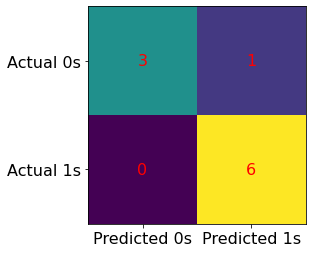

In [7]:
cm = confusion_matrix(y, model.predict(X))

plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [8]:
print(classification_report(y, model.predict(X)))


              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



# The code above creates a heatmap that represents the confusion matrix:
# You can get a more comprehensive report on the classification with

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


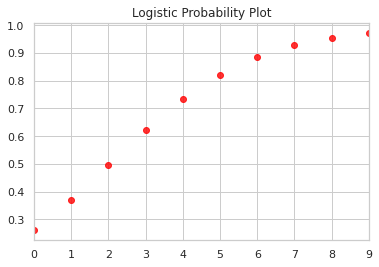

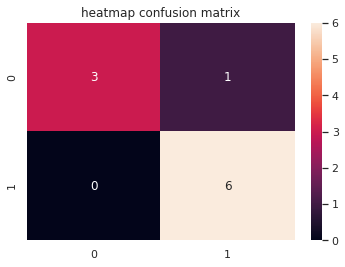

In [9]:
# from utilities2 import plot_classifier, plot_confusion_matrix
import seaborn as sns

def ap_log_regplot(ap_X, ap_y):
    plt.figure(figsize=(10,5))
    sns.regplot(ap_X, model.predict(X), logistic=True, color='green')
    return None

#ap_log_regplot(X, y)
#plt.show()
sns.set(style = 'whitegrid')
sns.regplot(X, model.predict_proba(X)[:,1], logistic=True, 
                       scatter_kws={"color": "red"}, line_kws={"color": "blue"}) #label=model.predict(X))
# sns.regplot(X, model.predict(X), logistic=True)
plt.title('Logistic Probability Plot')
plt.show()

#df_confusion_matrix=pd.crosstab(y,model.predict(X)[:,1],rownames=['Actual'],colnames=['Predicted'], normalize=True)
#plot_confusion_matrix(df_confusion_matrix, title='Cell Confusion matrix', cmap=plt.cm.Paired)
sns.heatmap(cm,  annot=True)
plt.title('heatmap confusion matrix')
plt.show()


Now we improve our model with the exchange of the solver from liblinear to lbfgs:

---




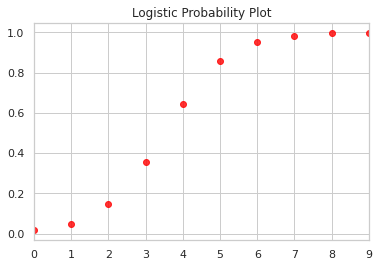

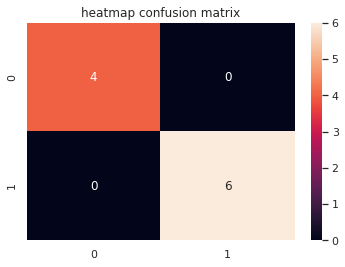

In [10]:
model = LogisticRegression(solver='lbfgs', C=1, random_state=0).fit(X, y)
sns.set(style = 'whitegrid')
sns.regplot(X, model.predict_proba(X)[:,1], logistic=True, 
                       scatter_kws={"color": "red"}, line_kws={"color": "blue"}) #label=model.predict(X))
# sns.regplot(X, model.predict(X), logistic=True)
plt.title('Logistic Probability Plot')
plt.show()

#df_confusion_matrix=pd.crosstab(y,model.predict(X)[:,1],rownames=['Actual'],colnames=['Predicted'], normalize=True)
#plot_confusion_matrix(df_confusion_matrix, title='Cell Confusion matrix', cmap=plt.cm.Paired)
cm = confusion_matrix(y, model.predict(X))
sns.heatmap(cm,  annot=True)
plt.title('heatmap confusion matrix')
plt.show()

In [0]:
import statsmodels.api as sm

# You can also implement AND study logistic regression in Python with the StatsModels package. 


In [12]:
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
x = sm.add_constant(X)
print(x, y)

smodel = sm.Logit(y, x)

result = smodel.fit(method='newton')
print(result.params)
print(result.predict(x))
print((result.predict(x) >= 0.5).astype(int))
print(result.pred_table())
print(result.summary(),'\n')

# These are detailed reports with values that you can obtain with appropriate methods and attributes. 

print(result.summary2())

# For more information, check out the official documentation related to LogitResults.
# https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.LogitResults.html


[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]] [0 1 0 0 1 1 1 1 1 1]
Optimization terminated successfully.
         Current function value: 0.350471
         Iterations 7
[-1.972805    0.82240094]
[0.12208792 0.24041529 0.41872657 0.62114189 0.78864861 0.89465521
 0.95080891 0.97777369 0.99011108 0.99563083]
[0 0 0 1 1 1 1 1 1 1]
[[2. 1.]
 [1. 6.]]
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Thu, 16 Apr 2020   Pseudo R-squ.:                  0.4263
Time:                        16:43:39   Log-Likelihood:                -3.5047
converged:                       True   LL-Null:                       -6.1086
Covariance Type:            nonrobust   LLR p-value: